In [2]:
print ('Proyek Kedua : Membuat Model Machine Learning dengan Data Time Series')
print ('Nama  : Murwanjani Tejo Riyono')
print ('Kelas : MLFE M1')

Proyek Kedua : Membuat Model Machine Learning dengan Data Time Series
Nama  : Murwanjani Tejo Riyono
Kelas : MLFE M1


In [3]:
import zipfile
local_zip = '/content/archive_48.zip' #Variable local_zip berisi direktori lokasi file zip disimpan

#Proses ekstrak file zip
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/archive_48')
zip_ref.close()

base_dir = '/content/archive_48/Summary of Weather.csv' #base_dir menampung nilai /content/archive_48/Summary

In [4]:
#Import library pandas dan numpy
import pandas as pd
import numpy as np

In [5]:
#Baca file csv
data = pd.read_csv(base_dir)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#Isi dataset
data.shape

(119040, 31)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [8]:
#Ceking nilai hilang pada dataset
data.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [9]:
#Tampil 10 data pertama
data.head(10)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10001,1942-7-6,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,6,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001,1942-7-7,T,NaN,28.333333,22.777778,25.555556,0,NaN,42,7,7,T,NaN,NaN,83.0,73.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10001,1942-7-8,3.556,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,8,0.14,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10001,1942-7-9,T,NaN,27.222222,22.777778,25.000000,0,NaN,42,7,9,T,NaN,NaN,81.0,73.0,77.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10001,1942-7-10,3.556,NaN,25.555556,21.666667,23.333333,0,NaN,42,7,10,0.14,NaN,NaN,78.0,71.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Convert object ke format waktu
data['Date']=pd.to_datetime(data['Date'])
data = data[['Date','MaxTemp' ]]
data.head(10)

,Date,MaxTemp
0,1942-07-01,25.555556
1,1942-07-02,28.888889
2,1942-07-03,26.111111
3,1942-07-04,26.666667
4,1942-07-05,26.666667
5,1942-07-06,26.666667
6,1942-07-07,28.333333
7,1942-07-08,26.666667
8,1942-07-09,27.222222
9,1942-07-10,25.555556


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Date     119040 non-null  datetime64[ns]
 1   MaxTemp  119040 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 MB


In [12]:
data1=data[['Date','MaxTemp']].copy()
data1.set_index('Date', inplace= True)
data1.head(10)

,MaxTemp
Date,
1942-07-01,25.555556
1942-07-02,28.888889
1942-07-03,26.111111
1942-07-04,26.666667
1942-07-05,26.666667
1942-07-06,26.666667
1942-07-07,28.333333
1942-07-08,26.666667
1942-07-09,27.222222


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119040 entries, 1942-07-01 to 1945-12-31
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   MaxTemp  119040 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [14]:
tanggal = data['Date'].values
maksimal = data['MaxTemp'].values

In [15]:
#Membagi data train dan data testing dan melihat banyaknya data setelah di split
from sklearn.model_selection import train_test_split

maksimal_latih, maksimal_test, tanggal_latih, tanggal_test = train_test_split(maksimal, 
                                                                              tanggal,
                                                                              test_size = 0.2, 
                                                                              random_state = 0, 
                                                                              shuffle=False)
print(len(maksimal_latih), len(maksimal_test))

95232 23808


In [16]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [17]:
#Membuat model
from keras.layers import Dense, LSTM

maksimal_latih = windowed_dataset(maksimal_latih, window_size=60, batch_size=100, shuffle_buffer=5000)
maksimal_test = windowed_dataset(maksimal_test, window_size=60, batch_size=100, shuffle_buffer=5000)


model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [18]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [19]:
#10% dari dataset
max = data['MaxTemp'].max()
min = data['MaxTemp'].min()
x = (max - min) * (10 / 100)
print(x)

8.333333333


In [20]:
#Kelas callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< x):
      print("\nMAE < 10% dari skala data!")
      self.model.stop_training = True
callbacks = myCallback()

In [21]:
#Melatih model 150x, otomatis berhenti jika mae < 10%
history = model.fit(maksimal_latih,
                    epochs=150, 
                    validation_data=(maksimal_test),
                    callbacks=[callbacks])

Epoch 1/150
952/952 [==============================] - 138s 139ms/step - loss: 13.5356 - mae: 14.0179 - val_loss: 2.3506 - val_mae: 2.8121
Epoch 2/150
952/952 [==============================] - 134s 140ms/step - loss: 2.9065 - mae: 3.3530 - val_loss: 1.9961 - val_mae: 2.4510

MAE < 10% dari skala data!


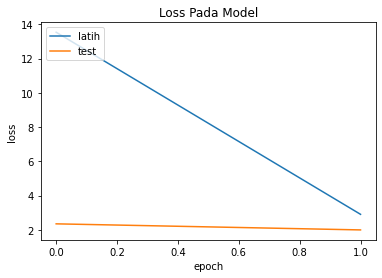

In [22]:
#Plot loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Pada Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['latih', 'test'], loc='upper left')
plt.show()